<img align="center" src="data/handout/course.png" width="800">

## Hough Transform - Assignment 1
    Instructor: Kris                          TAs: Arka, Jinkun, Rawal, Rohan, Sheng-Yu

<img align="center" src="data/handout/ht.gif" width="500">

---
## Programming Questions (75 points)
The programming questions are split into 4 parts, p1, p2, p3 and p4.

In [1]:
# DO NOT MODIFY! helper functions and constants
import cv2
import os
import glob
import numpy as np
import math
from matplotlib import pyplot as plt
import matplotlib
from scipy import signal
from types import SimpleNamespace
import time

#----------------------------------------------------------------------
def Gauss2D(kernel=(3,3),sigma=0.5):
    m,n = [(ss-1.)/2. for ss in kernel]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

#----------------------------------------------------------------------
def visualize(function, image_name, kernel_size=(5, 5)):
    image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2RGB)
    print("-" * 50 + "\n" + "Original Image:")
    plt.imshow(image); plt.show() # Displaying the sample image
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) # Convert image to grayscale
    h_filter = Gauss2D(kernel_size, constants.sigma)
    
    image_filtered = function(image, h_filter) # testing
    print("-" * 50 + "\n" + "Filtered Image:")
    plt.imshow(image_filtered, cmap="gray"); plt.show()
    
    reference_image_filtered = signal.convolve2d(image, h_filter, mode="same")
    print("-" * 50 + "\n" + "Reference Filtered Image:")
    plt.imshow(reference_image_filtered, cmap="gray"); plt.show()
        
    return

#----------------------------------------------------------------------
def test(function, image_name, kernel_size=(5, 5), threshold=1e-12):
    image = cv2.cvtColor(cv2.imread(image_name), cv2.COLOR_BGR2GRAY) # Convert image to grayscale
    h_filter = Gauss2D(kernel_size, constants.sigma)
    image_filtered = function(image, h_filter) # testing 
    reference_image_filtered = signal.convolve2d(image, h_filter, mode="same")
    
    error_arr = np.abs(reference_image_filtered - image_filtered)
    print('error: {}'.format(error_arr.mean()))
    assert(error_arr.mean() < threshold)
    return error_arr.mean()

#----------------------------------------------------------------------
def get_parameters():
    ##----------------------------------
    datadir     = 'data'    # the directory containing the images
    resultsdir  = 'results'  # the directory for dumping results

    ##-----------parameters------------
    constants = SimpleNamespace()
    constants.sigma      = 1.5
    constants.rho_res    = 1
    constants.theta_res  = 1
    constants.thres      = 30
    constants.num_lines  = 50

    image_list = []
    for filename in glob.glob(datadir+'/*.jpg'):
        image_list.append(filename)

    image_list.sort()
    return image_list, constants

#----------------------------------------------------------------------
image_list, constants = get_parameters()

### Q1.1 Convolution using nested FOR Loops (5 points)

Write a function that convolves an image with a given convolution filter using nested FOR loops.


```
  def filter_image(image, h_filter):
        return image_output
```

- **Input**: a grayscale image (*$image$*) and a convolution filter stored in matrix *$h\_filter$*. 
- **Output**: an image *$image\_output$* of the same size as *$image$* which results from convolving *$image$* with matrix *$h\_filter$*. 

**Instructions**
- You can assume that the matrix *$h\_filter$* represents a Gaussian filter and is odd sized along both dimensions.
- Stride = 1
- Your code **cannot** use pre-exising convolution functions in python such as  *numpy.convolve, scipy.signal.convolve2d, imfilter, conv2, convn, filter2, etc*. You may compare your output to these functions for comparison and debugging.
- You need to have the following nested FOR loop structure:
    * loop over height
    * then loop over width
    * finally, do convolution
- You will need to handle boundary cases on the edges of the image. 
- For example, when you place the center of the convolution mask on the top left corner of the image, most of the filter mask will lie outside the image. In this case, pad the image along the borders with zeros using *np.pad*.

**Grading**  
Your code will be autograded with
- hidden images 
- kernel sizes of (3, 3), (5, 5), (7, 7) 
- error threshold of 1e-12


In [2]:
def filter_image(image, h_filter):
    """Conduct convolutional filtering on the input image. 
    This function assumes that the input filter size is an odd number, 
    Pad the input image with 'constant' padding. 

    Args:
      image: np.array, HxW, the input grayscale image. 
      h_filter: np.array, KxK where K is the kernel size, the input image filter, created by the Gauss2D function. 

    Returns:
      image_output: np.array, HxW, the filtered image
    """
    start_time = time.time()
    row, col = image.shape
    h_row, h_col = h_filter.shape
    
    assert(h_row % 2 == 1 and h_col % 2 == 1)
    image = image.astype(np.float64) # uint8 -> float64
    image_output = np.empty_like(image) # output

    # Computes the row and col of padding needed
    row_padding = int(np.floor(h_row/2))
    col_padding = int(np.floor(h_col/2))
    
    # Pad the input image with zeros using the np.pad function. 
    # After this step, you should be able to perform convolution with the`same` padding scheme
    # Refer: https://www.geeksforgeeks.org/types-of-padding-in-convolution-layer/
    # image_pad = np.pad(?)
    # YOUR CODE HERE
    image = np.pad(image, [(row_padding, row_padding), (col_padding, col_padding)], mode='constant')
    h_filter_flipped = np.flip(h_filter)
    #raise NotImplementedError()
       
    # Perform convolution on the padded image. 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # image_output[i, j] = ?
            # YOUR CODE HERE
            if i < row_padding or j < col_padding:
                continue
            elif i >= row+row_padding or j >= col+col_padding:
                continue
            else:
                image_patch = image[i-row_padding:i+row_padding+1, j-col_padding:j+col_padding+1]
                val = np.sum(np.multiply(image_patch, h_filter_flipped))
                image_output[i-row_padding,j-col_padding] = val


    return image_output


### Test Q1.1


--------------------------------------------------
Original Image:


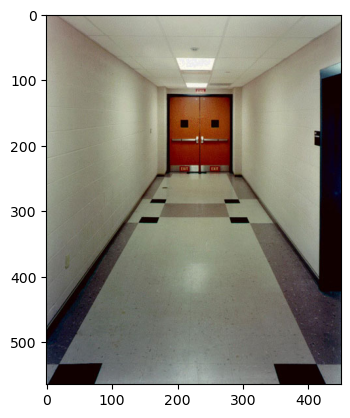

--------------------------------------------------
Filtered Image:


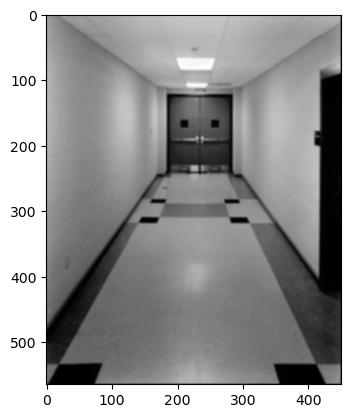

--------------------------------------------------
Reference Filtered Image:


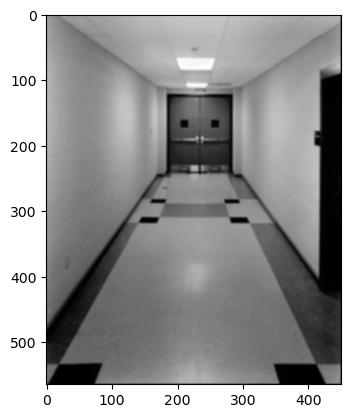

error: 1.549583492222212e-14
image_idx:2 error:1.549583492222212e-14


In [3]:
image_idx = np.random.randint(0, len(image_list))
visualize(filter_image, image_list[image_idx])
error = test(filter_image, image_list[image_idx])
print('image_idx:{} error:{}'.format(image_idx, error))

### Q1.2 Convolution with Vectorization (5 points)

Write a function that does convolution using vectorization.


```
  def filter_image_vec(image, h_filter):
        return image_output
```

- **Input** and **Output** same as above

**Instructions**
- All assumptions from before hold! 
- You can use numpy functions like *np.tile*, *np.dot*
- The vectorization schema is shown in the figure
- If done correctly, the vectorized convolution should be twice as fast or more than the nested loop convolution.

<img align="center" src="data/handout/q1_2.png" width="500">

**Grading**  
Same as Q1.1

### Test Q1.2

In [4]:
def filter_image_vec(image, h_filter):
    """Conduct convolutional filtering using vectorization on the input image

    Args:
      image: np.array, HxW, the input grayscale image. 
      h_filter: np.array, KxK where K is the kernel size, the input image filter, created by the Gauss2D function.

    Returns:
      image_output: np.array, HxW, the filtered image
    """
    row, col = image.shape
    h_row, h_col = h_filter.shape
    
    assert(h_row % 2 == 1 and h_col % 2 == 1)
    image = image.astype(np.float64) # uint8 -> float64

    # Computes the row and col of padding needed
    row_padding = int(np.floor(h_row/2))
    col_padding = int(np.floor(h_col/2))
    
    # Pad the input image with zeros same as before!
    # image_pad = np.pad(?)
    # YOUR CODE HERE
    image = np.pad(image, [(row_padding, row_padding), (col_padding, col_padding)], mode='constant')
    h_filter_flipped = np.flip(h_filter)
    h_flipped_opened = h_filter_flipped.reshape(-1,1)
    
    #raise NotImplementedError()
    windows = []
    # Perform convolution on the padded image. 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # what is our convolution window in the image?
            # window = ?
            # YOUR CODE HERE
            if i <row_padding or j < col_padding:
                continue
            elif i >= row+row_padding or j>= col + col_padding:
                continue
            else:
                window = image[i-row_padding:i+row_padding+1, j-col_padding:j+col_padding+1]
                windows.append(window.reshape(-1, 1))
    
    image_to_convolve = np.concatenate(windows, axis=1)  ## (h_row*h_col) x num_pixels
    
    # Perform matrix multiplication between the image_to_convolve and h_filter followed by reshape!
    # image_filter = ?
    # YOUR CODE HERE
    output = np.matmul(np.transpose(h_flipped_opened), image_to_convolve)
    image_output = np.reshape(output, (row, col))   
    return image_output

--------------------------------------------------
Original Image:


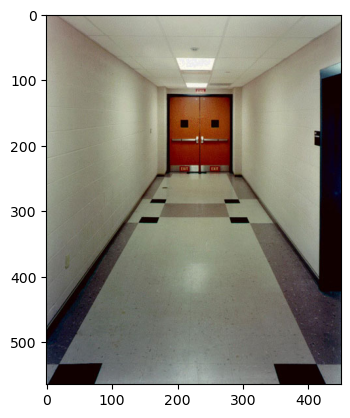

--------------------------------------------------
Filtered Image:


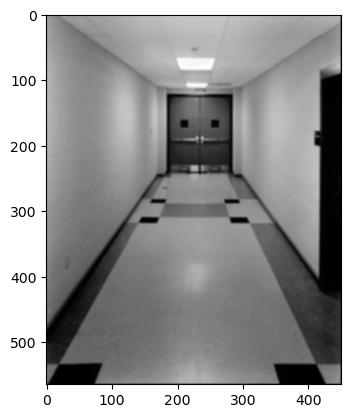

--------------------------------------------------
Reference Filtered Image:


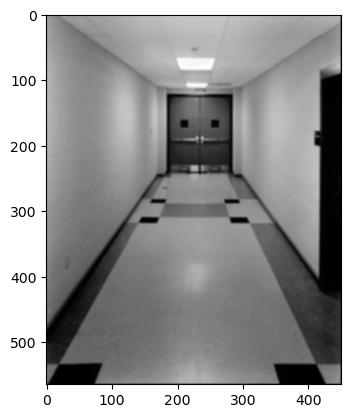

error: 1.8819305995571367e-14
image_idx:2 error:1.8819305995571367e-14


In [5]:
image_idx = np.random.randint(0, len(image_list))
visualize(filter_image_vec, image_list[image_idx])
error = test(filter_image_vec, image_list[image_idx])
print('image_idx:{} error:{}'.format(image_idx, error))

### Autograde Q1.1
0.5 points per test case, 10 test cases.

### Autograde Q1.2
0.5 points per test case, 10 test cases.